In [2]:
from pathlib import Path
import pandas as pd 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

In [3]:
# Study data files
path = "../Jennifer's_work/Clean_CSV.csv"

# Read data and the study results
data = pd.read_csv(path)
data.head() 

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120,3,45,10,12,Happiness
1,2,30,Male,Twitter,90,5,20,25,30,Anger
2,3,22,Non-binary,Facebook,60,2,15,5,20,Neutral
3,4,28,Female,Instagram,200,8,100,30,50,Anxiety
4,5,33,Male,LinkedIn,45,1,5,2,10,Boredom


Cindy's Work: Analysis over Age and Time Spent

In [4]:
# Calculate what the average overall usage time is 
cd_overall_avg_time = data['Daily_Usage_Time (minutes)'].mean()
cd_overall_avg_time

96.30952380952381

End Cindy's Work

### Daniel's Work

In [5]:
# Reading the CSV

social_data= pd.read_csv(path)
social_data.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120,3,45,10,12,Happiness
1,2,30,Male,Twitter,90,5,20,25,30,Anger
2,3,22,Non-binary,Facebook,60,2,15,5,20,Neutral
3,4,28,Female,Instagram,200,8,100,30,50,Anxiety
4,5,33,Male,LinkedIn,45,1,5,2,10,Boredom


In [6]:
# First Analysis comparisons between Age and Emotional Well Being
# Setting up the DataFrame to only use Age and Dominant Emotion Columns

analysis_1_df= social_data[["Age", "Dominant_Emotion"]]
analysis_1_df

,Age,Dominant_Emotion
0,25,Happiness
1,30,Anger
2,22,Neutral
3,28,Anxiety
4,33,Boredom
...,...,...
919,33,Boredom
920,22,Neutral
921,35,Happiness
922,28,Anger


In [7]:
# Calculating Median and Mode for the Age Column

median_age = analysis_1_df["Age"].median()
median_age

mode_age= analysis_1_df["Age"].mode()
mode_age

0    27
1    28
Name: Age, dtype: int64

In [8]:
# Description of Age Column
analysis_1_df["Age"].describe()

count    924.000000
mean      27.500000
std        3.941473
min       21.000000
25%       24.000000
50%       27.000000
75%       30.000000
max       35.000000
Name: Age, dtype: float64

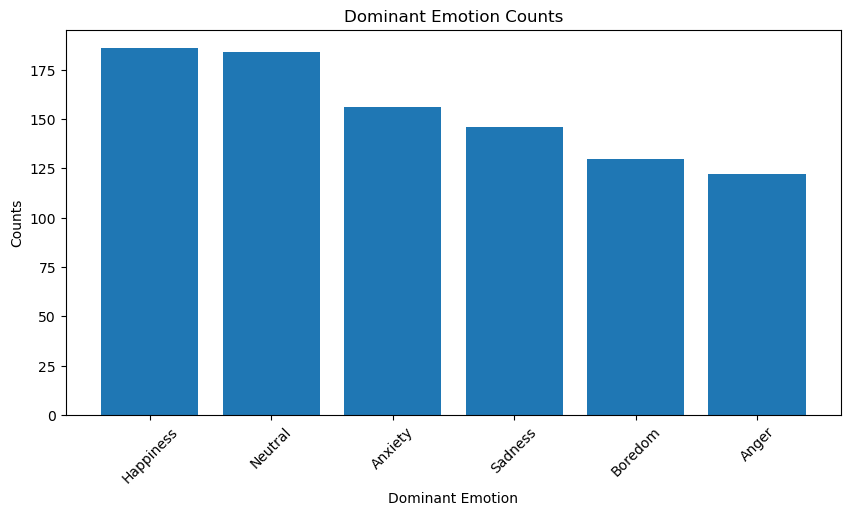

In [9]:
# Bar Graph to show the total counts of each Emotion

emotion_counts = analysis_1_df['Dominant_Emotion'].value_counts()

plt.figure(figsize=(10, 5))
plt.bar(emotion_counts.index, emotion_counts.values)
plt.title('Dominant Emotion Counts')
plt.xlabel('Dominant Emotion')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.savefig("../Images/Daniels_png_files/Emotion_Count.png")
plt.show()

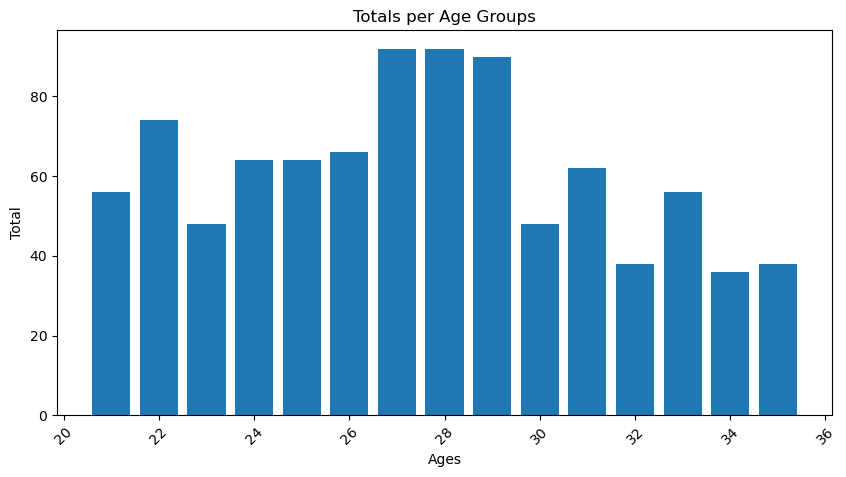

In [10]:
# Bar Graph showing the totals per Age Group

age_counts = analysis_1_df['Age'].value_counts()

# Create the bar chart
plt.figure(figsize=(10, 5))
plt.bar(age_counts.index, age_counts.values)
plt.title('Totals per Age Groups')
plt.xlabel('Ages')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.savefig("../Images/Daniels_png_files/Total_Age_Groups.png")
plt.show()

In [11]:
# Setting up DataFrame to only focus on the Happiness Emotion

happiness_df = analysis_1_df[analysis_1_df['Dominant_Emotion'] == 'Happiness']
happiness_df.value_counts()

Age  Dominant_Emotion
25   Happiness           40
28   Happiness           26
33   Happiness           20
30   Happiness           18
32   Happiness           18
24   Happiness           16
21   Happiness           10
22   Happiness           10
31   Happiness           10
35   Happiness           10
27   Happiness            8
Name: count, dtype: int64

In [12]:
# Setting up DataFrame to only focus on the ANger Emotion

anger_df = analysis_1_df[analysis_1_df['Dominant_Emotion'] == 'Anger']
anger_df.value_counts()

Age  Dominant_Emotion
27   Anger               20
28   Anger               20
30   Anger               20
24   Anger               18
29   Anger               18
32   Anger               10
23   Anger                8
34   Anger                8
Name: count, dtype: int64

In [13]:
# Value Count of just the 27 year old age group.

age_group_df = analysis_1_df[analysis_1_df['Age'] == 27]
age_group_df.value_counts()

Age  Dominant_Emotion
27   Anger               20
     Anxiety             18
     Boredom             18
     Neutral             18
     Sadness             10
     Happiness            8
Name: count, dtype: int64

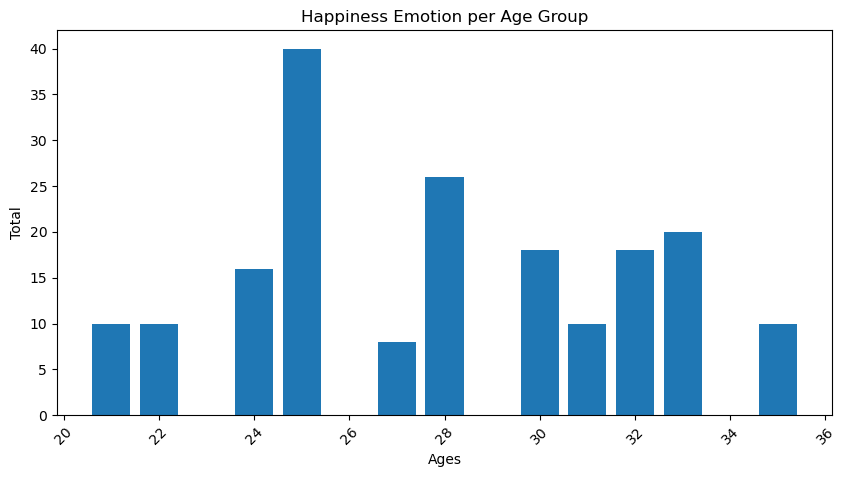

In [14]:
# Bar Graph showing the distribution of each Age group for only Happiness

happy_counts = happiness_df['Age'].value_counts()

# Creating the bar chart
plt.figure(figsize=(10, 5))
plt.bar(happy_counts.index, happy_counts.values)
plt.title('Happiness Emotion per Age Group')
plt.xlabel('Ages')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.savefig("../Images/Daniels_png_files/Happiness_Per_Age.png")
plt.show()

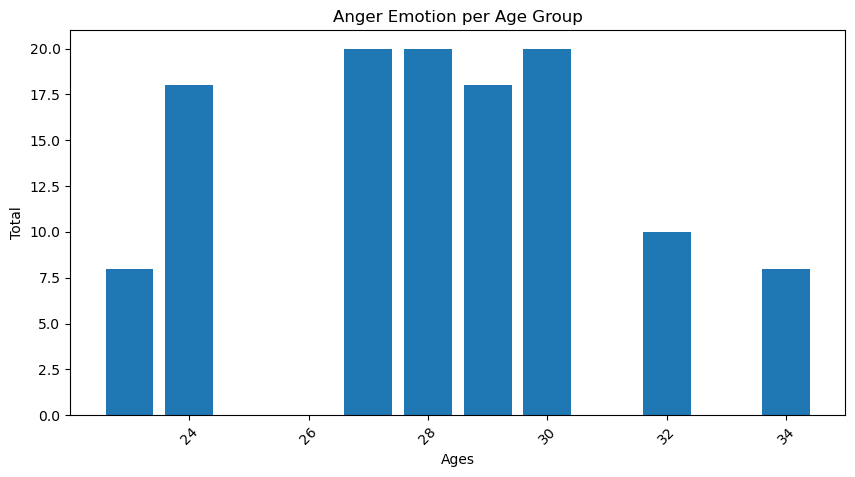

In [15]:
# Bar Graph showing the dsitribution of each Age group for only Anger

anger_counts = anger_df['Age'].value_counts()

# Creating the bar chart
plt.figure(figsize=(10, 5))
plt.bar(anger_counts.index, anger_counts.values)
plt.title('Anger Emotion per Age Group')
plt.xlabel('Ages')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.savefig("../Images/Daniels_png_files/Anger_Per_Age.png")
plt.show()

In [16]:
# Second Anaylsis comparison of Gender, Daily Usage in Minutes and Dominant Emotion

analysis_2_df= social_data[["Gender", "Daily_Usage_Time (minutes)", "Dominant_Emotion"]]
analysis_2_df

,Gender,Daily_Usage_Time (minutes),Dominant_Emotion
0,Female,120,Happiness
1,Male,90,Anger
2,Non-binary,60,Neutral
3,Female,200,Anxiety
4,Male,45,Boredom
...,...,...,...
919,Non-binary,85,Boredom
920,Female,70,Neutral
921,Male,110,Happiness
922,Non-binary,60,Anger


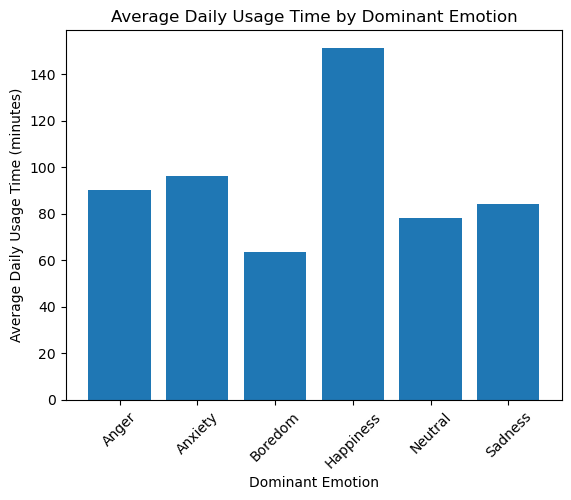

In [17]:
# Bar Graph comparing Emotion and Daily Usage in minutes

# Grouped by 'Dominant_Emotion' and calculated the mean daily usage time
emotion_usage = analysis_2_df.groupby('Dominant_Emotion')['Daily_Usage_Time (minutes)'].mean()

# Creation of the bar chart
plt.bar(emotion_usage.index, emotion_usage.values)
plt.title('Average Daily Usage Time by Dominant Emotion')
plt.xlabel('Dominant Emotion')
plt.ylabel('Average Daily Usage Time (minutes)')
plt.xticks(rotation=45)
plt.savefig("../Images/Daniels_png_files/Usage_per_Emotion.png")
plt.show()

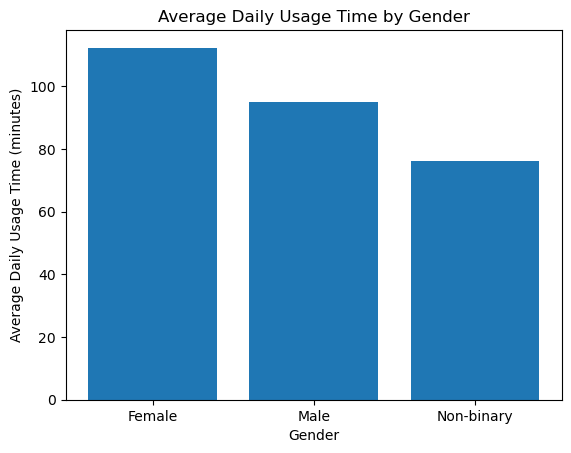

In [18]:
# Bar Graph comparing Gender and Daily Usage in minutes

# Grouped by 'Gender' and calculated the mean daily usage time
gender_usage = analysis_2_df.groupby('Gender')['Daily_Usage_Time (minutes)'].mean()

# Create a bar chart using Matplotlib
plt.bar(gender_usage.index, gender_usage.values)
plt.title('Average Daily Usage Time by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Daily Usage Time (minutes)')
plt.xticks(rotation=0)
plt.savefig("../Images/Daniels_png_files/Usage_Per_Gender.png")  
plt.show()

In [19]:
# Setting up Data Frame for only Male Gender

male_df = analysis_2_df[analysis_2_df['Gender'] == 'Male']
male_df

,Gender,Daily_Usage_Time (minutes),Dominant_Emotion
1,Male,90,Anger
4,Male,45,Boredom
5,Male,150,Happiness
9,Male,170,Happiness
12,Male,65,Boredom
...,...,...,...
910,Male,85,Sadness
913,Male,70,Anxiety
916,Male,75,Neutral
918,Male,150,Anxiety


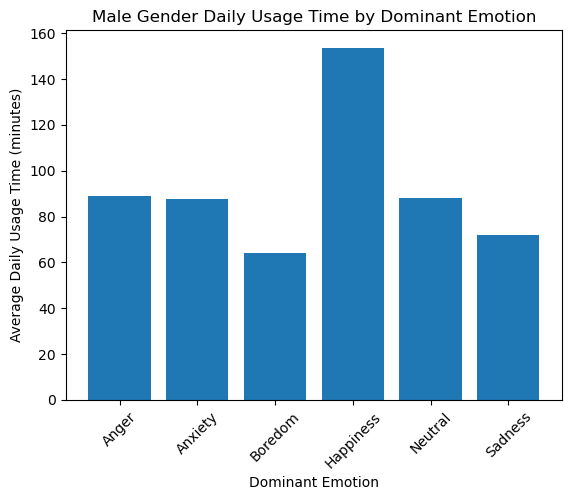

In [20]:
# Bar Graph for only Males, comparing their Emotional state vs Social Media Usage in Minutes

# Grouping by 'Dominant_Emotion' and calculating the mean daily usage time for only males
male_usage = male_df.groupby('Dominant_Emotion')['Daily_Usage_Time (minutes)'].mean()

# Created a bar chart using Matplotlib
plt.bar(male_usage.index, male_usage.values)
plt.title('Male Gender Daily Usage Time by Dominant Emotion')
plt.xlabel('Dominant Emotion')
plt.ylabel('Average Daily Usage Time (minutes)')
plt.xticks(rotation=45)
plt.savefig("../Images/Daniels_png_files/Male_usage_vs_emotion.png")
plt.show()

In [21]:
# Average time spent per emotion for male individuals.
male_usage

Dominant_Emotion
Anger         88.965517
Anxiety       87.857143
Boredom       64.074074
Happiness    153.636364
Neutral       88.043478
Sadness       72.115385
Name: Daily_Usage_Time (minutes), dtype: float64

In [22]:
# Setting up Data Frame for only Female Gender

female_df = analysis_2_df[analysis_2_df['Gender'] == 'Female']
female_df

,Gender,Daily_Usage_Time (minutes),Dominant_Emotion
0,Female,120,Happiness
3,Female,200,Anxiety
6,Female,85,Anger
8,Female,55,Neutral
10,Female,75,Anxiety
...,...,...,...
912,Female,170,Happiness
915,Female,105,Anger
917,Female,95,Sadness
920,Female,70,Neutral


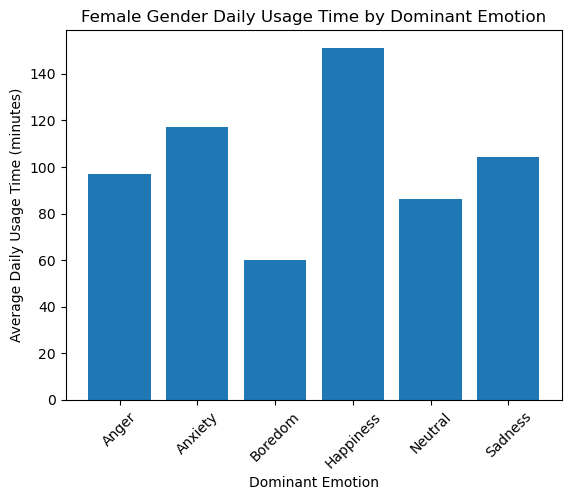

In [23]:
# Bar Graph for only Females, comparing their Emotional state vs Social Media Usage in Minutes

# Grouping by 'Dominant_Emotion' and calculating the mean daily usage time for females
female_usage = female_df.groupby('Dominant_Emotion')['Daily_Usage_Time (minutes)'].mean()

# Created a bar chart using Matplotlib
plt.bar(female_usage.index, female_usage.values)
plt.title('Female Gender Daily Usage Time by Dominant Emotion')
plt.xlabel('Dominant Emotion')
plt.ylabel('Average Daily Usage Time (minutes)')
plt.xticks(rotation=45)
plt.savefig("../Images/Daniels_png_files/Female_usage_vs_emotion.png")
plt.show()

In [24]:
# Average time spent per emotion for female individuals.

female_usage

Dominant_Emotion
Anger         96.851852
Anxiety      117.037037
Boredom       60.000000
Happiness    151.176471
Neutral       86.428571
Sadness      104.375000
Name: Daily_Usage_Time (minutes), dtype: float64

In [25]:
# Setting up Data Frame for only Non-Binary Gender

non_binary_df = analysis_2_df[analysis_2_df['Gender'] == 'Non-binary']
non_binary_df

,Gender,Daily_Usage_Time (minutes),Dominant_Emotion
2,Non-binary,60,Neutral
7,Non-binary,110,Sadness
11,Non-binary,95,Sadness
15,Non-binary,40,Neutral
18,Non-binary,50,Neutral
...,...,...,...
908,Non-binary,75,Boredom
911,Non-binary,60,Neutral
914,Non-binary,50,Boredom
919,Non-binary,85,Boredom


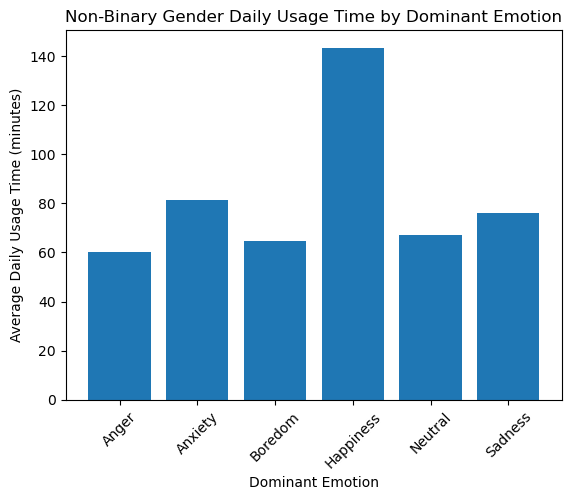

In [26]:
# Bar Graph for only Non-Binary, comparing their Emotional state vs Social Media Usage in Minutes

# Grouping by 'Dominant_Emotion' and calculating the mean daily usage time for non-binary
nb_usage = non_binary_df.groupby('Dominant_Emotion')['Daily_Usage_Time (minutes)'].mean()

# Created a bar chart using Matplotlib
plt.bar(nb_usage.index, nb_usage.values)
plt.title('Non-Binary Gender Daily Usage Time by Dominant Emotion')
plt.xlabel('Dominant Emotion')
plt.ylabel('Average Daily Usage Time (minutes)')
plt.xticks(rotation=45)
plt.savefig("../Images/Daniels_png_files/Nonbinary_usage_vs_emotion.png")
plt.show()

In [27]:
# Average time spent per emotion for non-binary individuals

nb_usage

Dominant_Emotion
Anger         60.000000
Anxiety       81.304348
Boredom       64.782609
Happiness    143.333333
Neutral       66.951220
Sadness       76.086957
Name: Daily_Usage_Time (minutes), dtype: float64

In [28]:
# Third Analysis comparisons between Posts, Likes, Comments and Messages per day and Dominant Emotion

analysis_3_df = social_data[["Posts_Per_Day", "Likes_Received_Per_Day", 
                             "Comments_Received_Per_Day", "Messages_Sent_Per_Day", "Dominant_Emotion"]]
analysis_3_df

,Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,3,45,10,12,Happiness
1,5,20,25,30,Anger
2,2,15,5,20,Neutral
3,8,100,30,50,Anxiety
4,1,5,2,10,Boredom
...,...,...,...,...,...
919,4,35,18,18,Boredom
920,1,14,6,10,Neutral
921,3,50,25,25,Happiness
922,2,18,8,18,Anger


In [29]:
# Value count of Emotions

analysis_3_df["Dominant_Emotion"].value_counts()

Dominant_Emotion
Happiness    186
Neutral      184
Anxiety      156
Sadness      146
Boredom      130
Anger        122
Name: count, dtype: int64

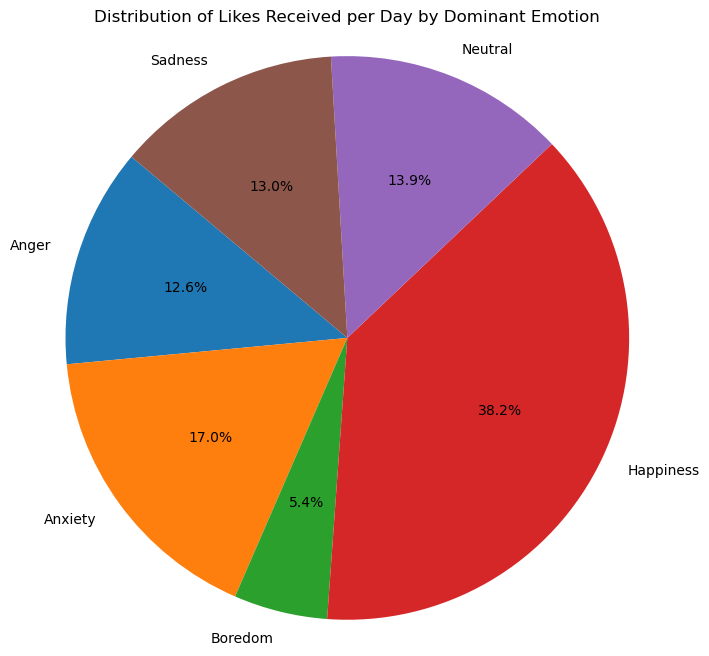

In [30]:
# Pie Chart Comparison of Likes received and Emotion

# Grouping by Dominant Emotion and sum of the Likes Received
emotion_likes = analysis_3_df.groupby('Dominant_Emotion')['Likes_Received_Per_Day'].sum()

# Created a pie chart
plt.figure(figsize=(8, 8))
plt.pie(emotion_likes, labels=emotion_likes.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Likes Received per Day by Dominant Emotion')
plt.axis('equal')
plt.savefig("../Images/Daniels_png_files/Likes_vs_emotion.png") 
plt.show()

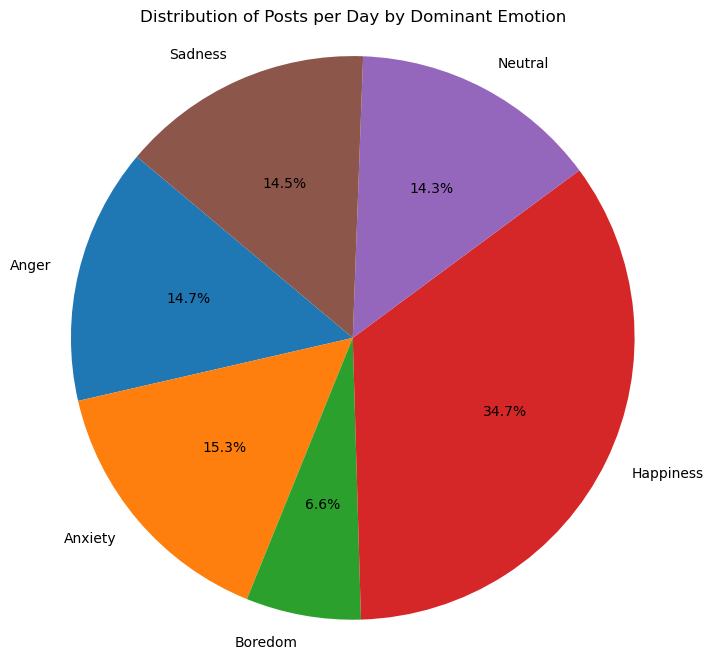

In [31]:
# Pie Chart Comparison of Posts per day and Emotion

emotion_posts = analysis_3_df.groupby('Dominant_Emotion')['Posts_Per_Day'].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(emotion_posts, labels=emotion_likes.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Posts per Day by Dominant Emotion')
plt.axis('equal')
plt.savefig("../Images/Daniels_png_files/Posts_vs_emotion.png")   
plt.show()

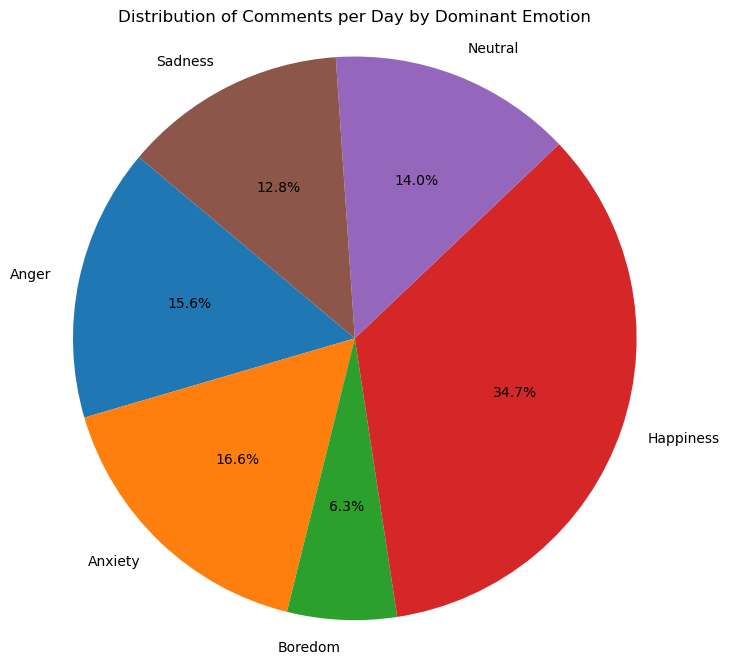

In [32]:
# Pie Chart Comparison of Comments per day and Emotion

# Grouping by Dominant Emotion and sum of the Comments per day.
emotion_comments = analysis_3_df.groupby('Dominant_Emotion')['Comments_Received_Per_Day'].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(emotion_comments, labels=emotion_likes.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Comments per Day by Dominant Emotion')
plt.axis('equal')
plt.savefig("../Images/Daniels_png_files/Comments_vs_emotion.png")   
plt.show()

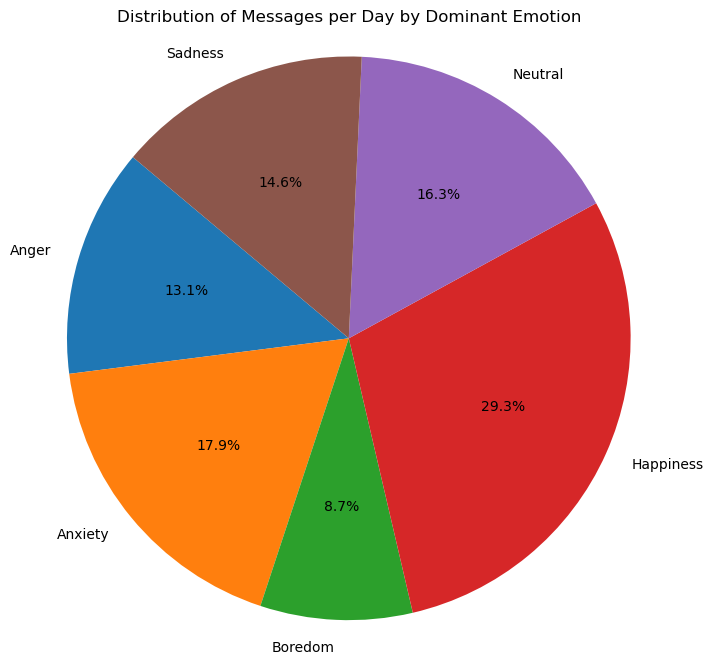

In [33]:
# Pie Chart Comparison of Messages per day and Emotion

# Grouping by Dominant Emotion and sum of Messages per day
emotion_messages = analysis_3_df.groupby('Dominant_Emotion')['Messages_Sent_Per_Day'].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(emotion_messages, labels=emotion_likes.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Messages per Day by Dominant Emotion')
plt.axis('equal')
plt.savefig("../Images/Daniels_png_files/Messages_vs_emotion.png")  
plt.show()

In [34]:
# Combined Emotions Data Frame to see totals

combined_emotions_df = pd.DataFrame({
    'Messages Sent Per Day': emotion_messages,
    'Comments Received Per Day': emotion_comments,
    'Posts Per Day': emotion_posts,
    'Likes Received Per Day': emotion_likes
})

# Print the combined DataFrame
print(combined_emotions_df)

                  Messages Sent Per Day  Comments Received Per Day  \
Dominant_Emotion                                                     
Anger                              2740                       2274   
Anxiety                            3739                       2411   
Boredom                            1822                        912   
Happiness                          6119                       5041   
Neutral                            3405                       2031   
Sadness                            3053                       1862   

                  Posts Per Day  Likes Received Per Day  
Dominant_Emotion                                         
Anger                       455                    4687  
Anxiety                     473                    6318  
Boredom                     204                    1999  
Happiness                  1073                   14212  
Neutral                     442                    5152  
Sadness                     448  

End of Daniel's Work

### Zilan's Work

In [35]:
# First Analysis gender vs Platform

zln_analysis_1_df= social_data[["Gender", "Platform"]]
zln_analysis_1_df

,Gender,Platform
0,Female,Instagram
1,Male,Twitter
2,Non-binary,Facebook
3,Female,Instagram
4,Male,LinkedIn
...,...,...
919,Non-binary,Twitter
920,Female,Facebook
921,Male,Whatsapp
922,Non-binary,Telegram


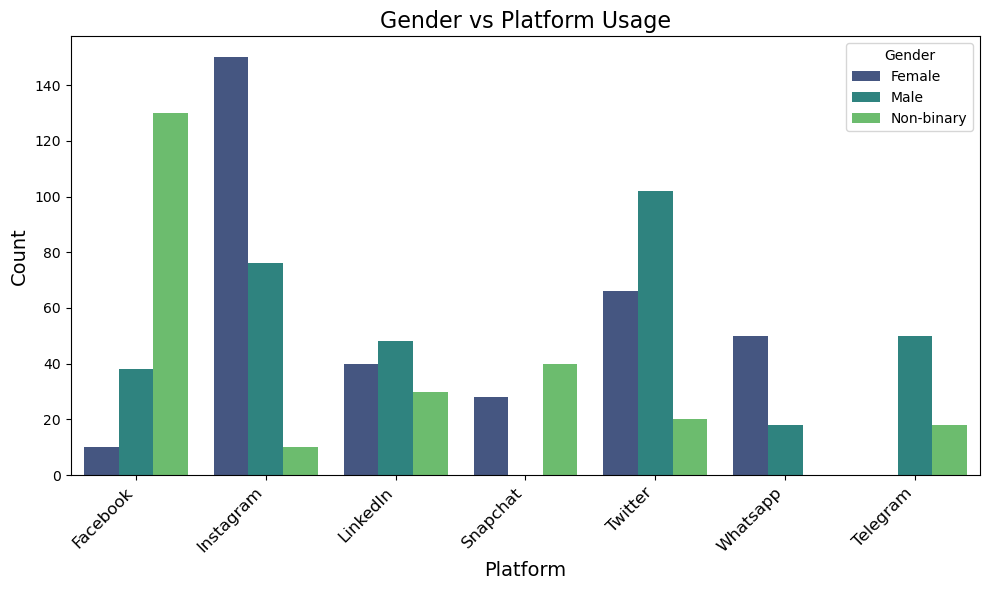

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Step 1: Count the occurrences of each platform by gender
gender_platform_counts = zln_analysis_1_df.groupby(['Gender', 'Platform']).size().reset_index(name='Count')

# Step 2: Set up the plot
plt.figure(figsize=(10, 6))

# Step 3: Create a bar plot
sns.barplot(x='Platform', y='Count', hue='Gender', data=gender_platform_counts, palette='viridis')

# Step 4: Add titles and labels
plt.title('Gender vs Platform Usage', fontsize=16)
plt.xlabel('Platform', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Step 5: Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Step 6: Adjust the layout to prevent clipping
plt.tight_layout()

# Step 7: Ensure the directory exists before saving the plot
output_dir = "../Images/"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the plot
plt.savefig(os.path.join(output_dir, "gender_platform.png"))

# Step 8: Show the plot
plt.show()


In [37]:
# Filter for male entries
male_data = zln_analysis_1_df[zln_analysis_1_df['Gender'] == 'Male'] 

# Count the occurrences of each platform
most_used_platform = male_data['Platform'].value_counts().idxmax()

# Print the result
most_used_platform

'Twitter'

In [38]:


# Filter for female entries
female_data = zln_analysis_1_df[zln_analysis_1_df['Gender'] == 'Female'] 

# Count the occurrences of each platform
most_used_platform = female_data['Platform'].value_counts().idxmax()

# Print the result
most_used_platform

'Instagram'

In [39]:

# Filter for Non-binary entries
Non_binary_data = zln_analysis_1_df[zln_analysis_1_df['Gender'] == 'Non-binary'] 

# Count the occurrences of each platform
most_used_platform = Non_binary_data['Platform'].value_counts().idxmax()

# Print the result
print(most_used_platform)

Facebook


In [40]:
# Second Anaylsis Age vs Platform

zln_analysis_2_df= social_data[["Age",  "Platform"]]
zln_analysis_2_df

,Age,Platform
0,25,Instagram
1,30,Twitter
2,22,Facebook
3,28,Instagram
4,33,LinkedIn
...,...,...
919,33,Twitter
920,22,Facebook
921,35,Whatsapp
922,28,Telegram


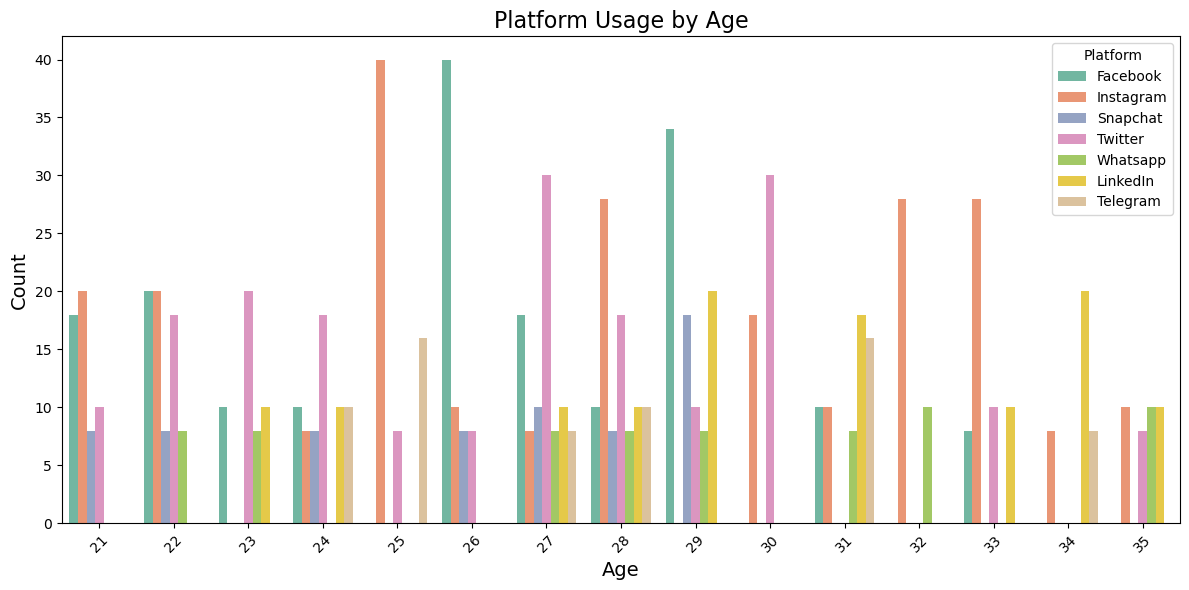

In [41]:

# Step 1: Count the occurrences of each platform for every age group
age_platform_counts = zln_analysis_2_df.groupby(['Age', 'Platform']).size().reset_index(name='Count')

# Step 2: Set up the plot
plt.figure(figsize=(12, 6))

# Step 3: Create the bar plot
sns.barplot(x='Age', y='Count', hue='Platform', data=age_platform_counts, palette='Set2')

# Step 4: Add titles and labels
plt.title('Platform Usage by Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Step 5: Rotate x-axis labels for better readability (if needed)
plt.xticks(rotation=45)

# Step 6: Adjust layout to prevent clipping
plt.tight_layout()

# Step 7: Show the plot
plt.savefig("../Images/age_platform.png")
plt.show()

In [42]:
avg_age= zln_analysis_2_df["Age"].mean()
avg_age

27.5

In [43]:
# Filter for male entries
data_27= zln_analysis_2_df[zln_analysis_2_df['Age'] == 27] 

# Count the occurrences of each platform
most_used_platform = data_27['Platform'].value_counts().idxmax()

# Print the result
most_used_platform

'Twitter'

In [44]:
# Filter for male entries
data_28= zln_analysis_2_df[zln_analysis_2_df['Age'] == 28] 

# Count the occurrences of each platform
most_used_platform = data_28['Platform'].value_counts().idxmax()

# Print the result
most_used_platform

'Instagram'

In [45]:

# Filter for female entries
data_27= zln_analysis_2_df[zln_analysis_2_df['Age'] == 27] 

# Count the occurrences of each platform
most_used_platform = data_27['Platform'].value_counts().idxmax()

# Print the result
most_used_platform

'Twitter'

In [46]:
# Filter for female entries
data_28= zln_analysis_2_df[zln_analysis_2_df['Age'] == 28] 

# Count the occurrences of each platform
most_used_platform = data_28['Platform'].value_counts().idxmax()

# Print the result
most_used_platform

'Instagram'

In [47]:
# Filter for  Non-binary entries
data_27= zln_analysis_2_df[zln_analysis_2_df['Age'] == 27] 

# Count the occurrences of each platform
most_used_platform = data_27['Platform'].value_counts().idxmax()

# Print the result
most_used_platform

'Twitter'

In [48]:

# Filter for  Non-binary entries
data_27= zln_analysis_2_df[zln_analysis_2_df['Age'] == 28] 

# Count the occurrences of each platform
most_used_platform = data_27['Platform'].value_counts().idxmax()

# Print the result
most_used_platform

'Instagram'

In [49]:
# Third Analysis gender, age, platform
zln_analysis_3_df = social_data[["Gender", "Age", "Platform"]]
zln_analysis_3_df

,Gender,Age,Platform
0,Female,25,Instagram
1,Male,30,Twitter
2,Non-binary,22,Facebook
3,Female,28,Instagram
4,Male,33,LinkedIn
...,...,...,...
919,Non-binary,33,Twitter
920,Female,22,Facebook
921,Male,35,Whatsapp
922,Non-binary,28,Telegram


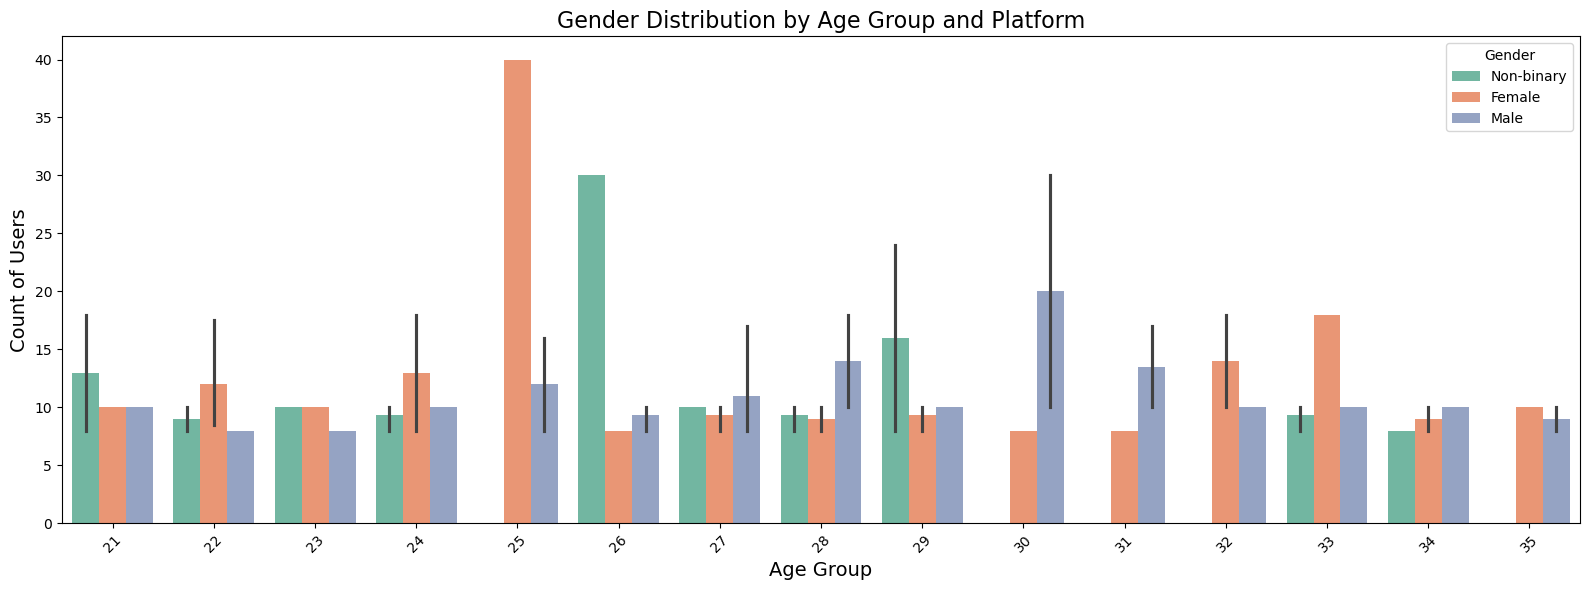

In [50]:

# Step 1: Group the data by Gender, Age, and Platform and count the occurrences
gender_age_platform_counts = zln_analysis_3_df.groupby(['Age', 'Platform', 'Gender']).size().reset_index(name='Count')

# Step 2: Set up the figure for the bar chart
plt.figure(figsize=(16, 6))

# Step 3: Create the bar plot
sns.barplot(x='Age', y='Count', hue='Gender', data=gender_age_platform_counts, palette='Set2')

# Step 4: Add titles and labels
plt.title('Gender Distribution by Age Group and Platform', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Count of Users', fontsize=14)

# Step 5: Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Step 6: Adjust layout to prevent clipping
plt.tight_layout()

# Step 7: Show the plot
plt.savefig("../Images/gender_age_and_platform.png")
plt.show()

In [51]:
# Filter for female entries
female_data = zln_analysis_3_df[zln_analysis_3_df['Gender'] == 'Female']

# Filter for females aged 27
female_27_data = female_data[female_data['Age'] == 27]

# Calculate the most used platform by counting occurrences
most_used_platform = female_27_data['Platform'].value_counts().idxmax()

# Display the result
print(f"The most used platform by women aged 27 is: {most_used_platform}")

The most used platform by women aged 27 is: Twitter


In [52]:
# Filter for female entries
female_data = zln_analysis_3_df[zln_analysis_3_df['Gender'] == 'Female']

# Filter for females aged 27
female_27_data = female_data[female_data['Age'] == 28]

# Calculate the most used platform by counting occurrences
most_used_platform = female_27_data['Platform'].value_counts().idxmax()

# Display the result
print(f"The most used platform by women aged 28 is: {most_used_platform}")

The most used platform by women aged 28 is: Instagram


In [53]:
# Filter for male entries
male_data = zln_analysis_3_df[zln_analysis_3_df['Gender'] == 'Male']

# Filter for males aged 27
male_data_27 = male_data[male_data['Age'] == 27]

# Calculate the most used platform by counting occurrences
most_used_platform = male_data_27['Platform'].value_counts().idxmax()

# Display the result
print(f"The most used platform by men aged 27 is: {most_used_platform}")


The most used platform by men aged 27 is: Twitter


In [54]:
# Filter for male entries
male_data = zln_analysis_3_df[zln_analysis_3_df['Gender'] == 'Male']

# Filter for males aged 27
male_data_27 = male_data[male_data['Age'] == 28]

# Calculate the most used platform by counting occurrences
most_used_platform = male_data_27['Platform'].value_counts().idxmax()

# Display the result
print(f"The most used platform by men aged 28 is: {most_used_platform}")

The most used platform by men aged 28 is: Instagram


In [55]:
# Filter for non-binary entries
non_binary_data = zln_analysis_3_df[zln_analysis_3_df['Gender'] == 'Non-binary']

# Calculate the average age of non-binary individuals
average_age = non_binary_data['Age'].mean()

# Filter for non-binary individuals at the average age
non_binary_average_age_data = non_binary_data[non_binary_data['Age'] == 27]

# Calculate the most used platform by counting occurrences
most_used_platform = non_binary_average_age_data['Platform'].value_counts().idxmax()

# Display the result
print(f"The most used platform by non-binary aged 27 is: {most_used_platform}")

The most used platform by non-binary aged 27 is: LinkedIn


In [56]:
# Filter for non-binary entries
non_binary_data = zln_analysis_3_df[zln_analysis_3_df['Gender'] == 'Non-binary']

# Calculate the average age of non-binary individuals
average_age = non_binary_data['Age'].mean()

# Filter for non-binary individuals at the average age
non_binary_average_age_data = non_binary_data[non_binary_data['Age'] == 28]

# Calculate the most used platform by counting occurrences
most_used_platform = non_binary_average_age_data['Platform'].value_counts().idxmax()

# Display the result
print(f"The most used platform by non-binary aged 28 is: {most_used_platform}")

The most used platform by non-binary aged 28 is: Facebook


End of Zilan's Work

### Jennifer's Work

Analysis for Gender vs Emotional Well bing

In [60]:
# Define colors for each emotion (Jenny's work) 
#Will use varaiable for each graph
emotion_colors = {
    'Anger': 'red',
    'Happiness': 'yellow',
    'Neutral': 'grey',
    'Anxiety': 'orange',
    'Boredom': 'green',
    'Sadness': 'blue'
}

In [59]:

jen_1 = data[["Gender", "Dominant_Emotion"]].copy()
jen_1.head()

,Gender,Dominant_Emotion
0,Female,Happiness
1,Male,Anger
2,Non-binary,Neutral
3,Female,Anxiety
4,Male,Boredom


In [75]:
jen_1["Gender"].value_counts()

Gender
Female        344
Male          332
Non-binary    248
Name: count, dtype: int64

In [76]:
jen_1["Dominant_Emotion"].value_counts()

Dominant_Emotion
Happiness    186
Neutral      184
Anxiety      156
Sadness      146
Boredom      130
Anger        122
Name: count, dtype: int64

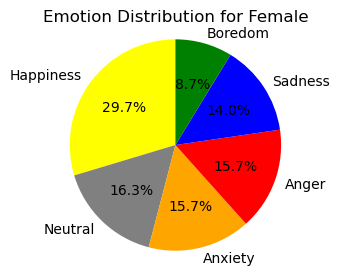

In [61]:
#Create a pie chart for each gender
# Female
jen_female_data = jen_1[jen_1['Gender'] == 'Female']['Dominant_Emotion'].value_counts()
plt.figure(figsize=(3, 3))
plt.pie(
    jen_female_data, 
    labels=jen_female_data.index, 
    colors=[emotion_colors.get(emotion, 'grey') for emotion in jen_female_data.index], 
    autopct='%1.1f%%', 
    startangle=90
)
plt.title('Emotion Distribution for Female')
plt.axis('equal')
plt.show()

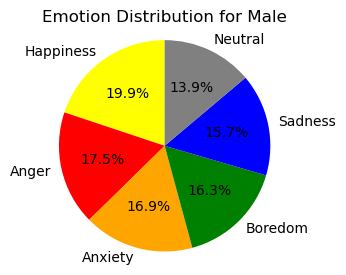

In [62]:
# Male
jen_male_data = jen_1[jen_1['Gender'] == 'Male']['Dominant_Emotion'].value_counts()
plt.figure(figsize=(3, 3))
plt.pie(
    jen_male_data, 
    labels=jen_male_data.index, 
    colors=[emotion_colors.get(emotion, 'grey') for emotion in jen_male_data.index], 
    autopct='%1.1f%%', 
    startangle=90
)
plt.title('Emotion Distribution for Male')
plt.axis('equal')
plt.show()

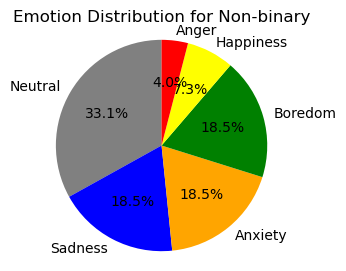

In [63]:
# Non-binary
jen_nonbinary_data = jen_1[jen_1['Gender'] == 'Non-binary']['Dominant_Emotion'].value_counts()
plt.figure(figsize=(3, 3))
plt.pie(
    jen_nonbinary_data, 
    labels=jen_nonbinary_data.index, 
    colors=[emotion_colors.get(emotion, 'grey') for emotion in jen_nonbinary_data.index], 
    autopct='%1.1f%%', 
    startangle=90
)
plt.title('Emotion Distribution for Non-binary')
plt.axis('equal')
plt.show()

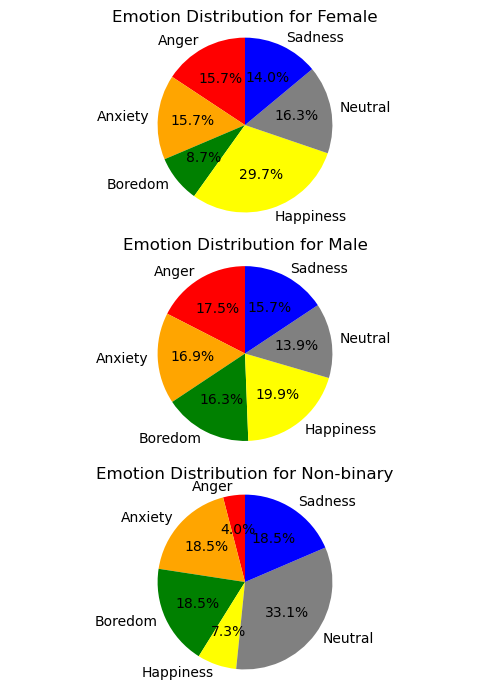

In [64]:
# Did a pie chart image with all 3 genders :) 
#  Create a contingency table for Gender and Dominant Emotion
contingency_table = pd.crosstab(jen_1['Dominant_Emotion'], jen_1['Gender'])

# Plot a pie chart for the distribution of emotions for each gender
plt.figure(figsize=(5, 7))  # Adjusting the figure size for vertical layout

# Plotting the pie chart for each gender's emotion distribution
for idx, gender in enumerate(contingency_table.columns):
    plt.subplot(len(contingency_table.columns), 1, idx + 1)  # Adjusting subplot for vertical layout
    
    # Extract counts for each emotion and corresponding colors
    sizes = contingency_table[gender]
    labels = contingency_table.index
    colors = [emotion_colors.get(emotion, 'grey') for emotion in labels]  # Use defined colors or default to grey

    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.title(f'Emotion Distribution for {gender}')
    plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

plt.tight_layout()
plt.show()

Analysis for Age vs Minutes Spent Vs Emotional Well-Being

In [65]:
jen_2 = data[["Age","Daily_Usage_Time (minutes)","Dominant_Emotion"]].copy()
jen_2.head() 

,Age,Daily_Usage_Time (minutes),Dominant_Emotion
0,25,120,Happiness
1,30,90,Anger
2,22,60,Neutral
3,28,200,Anxiety
4,33,45,Boredom


In [77]:
jen_2["Dominant_Emotion"].value_counts()

Dominant_Emotion
Happiness    186
Neutral      184
Anxiety      156
Sadness      146
Boredom      130
Anger        122
Name: count, dtype: int64

In [79]:
age_max= jen_2["Age"].max()
print("This is the Age max", age_max)
age_min= jen_2["Age"].min()
print("This is the Age min", age_min)
age_average = jen_2["Age"].mean()
print("This is the average Age", age_average)
age_count= jen_2["Age"].value_counts()
print("These are the value count of each Age group:", age_count)

This is the Age max 35
This is the Age min 21
This is the average Age 27.5
These are the value count of each Age group: Age
28    92
27    92
29    90
22    74
26    66
25    64
24    64
31    62
33    56
21    56
30    48
23    48
35    38
32    38
34    36
Name: count, dtype: int64


In [66]:
# Mapping emotions to colors using the pre-defined emotion_colors
# created a new column that contains the colors that will be used to color the scatter plot points
# based on the emotion associated with each row
jen_2['emotion_color'] = jen_2['Dominant_Emotion'].map(emotion_colors)

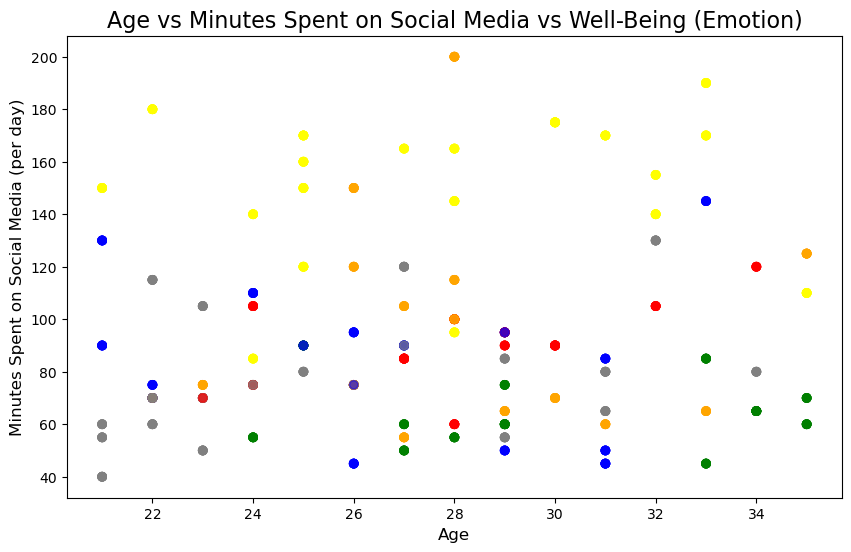

In [67]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(jen_2['Age'], jen_2['Daily_Usage_Time (minutes)'], 
            c=jen_2['emotion_color'], alpha=0.6)

# Set plot title and labels
plt.title('Age vs Minutes Spent on Social Media vs Well-Being (Emotion)', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Minutes Spent on Social Media (per day)', fontsize=12)

# Show the plot
plt.show()
#color of the dots are the emotions 

In [68]:
#I did another scatter plot graph since I want to make all the dots different sizes to show which emotion has the highest count/lowest count 
#I did use chat gpt to help me develop this code since I kept getting an iloc error
#Turned out that I had to make a copy of the subset data 
#Neutral is the biggest dot so you can see that most people are mindlessly scrolling through social media

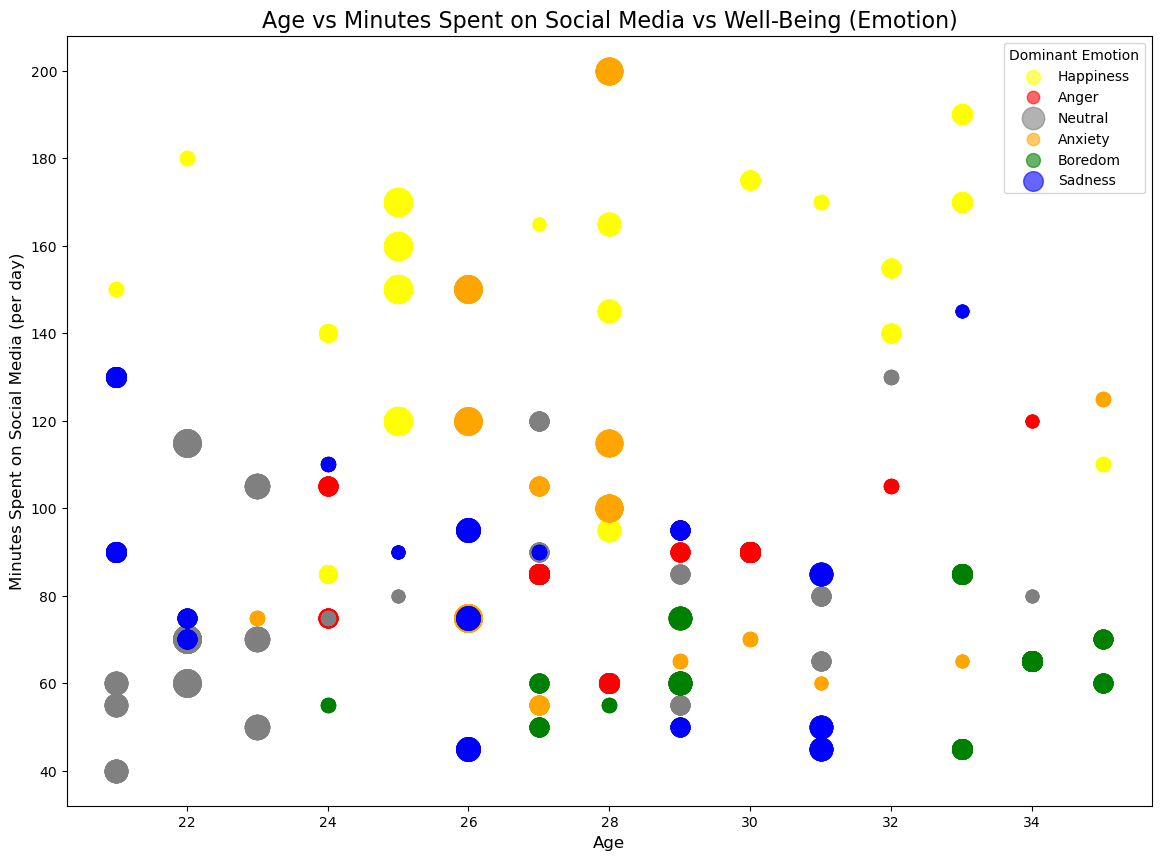

In [69]:
# Set up the figure for the plot
plt.figure(figsize=(14, 10))

# Group data by Age and Dominant Emotion to count occurrences (using ques_8)
emotion_counts = jen_2.groupby(['Age', 'Dominant_Emotion']).size().reset_index(name='count')

# Plot data for each emotion with specified colors and dot size based on the count of each emotion in each age group
for emotion in jen_2['Dominant_Emotion'].unique():
    # Filter data for the specific emotion and create a copy of the DataFrame to avoid the SettingWithCopyWarning
    emotion_data = emotion_counts[emotion_counts['Dominant_Emotion'] == emotion].copy()
    
    # Adjust the dot size based on the count of each emotion within each age group
    size_factor = 10  # Adjust this factor to make the sizes more readable
    emotion_data['dot_size'] = emotion_data['count'] * size_factor  # Safely assign dot_size
    
    # Plot for Age vs Minutes Spent with color mapped to emotion and size based on count
    for idx, row in emotion_data.iterrows():
        # Filter the original ques_8 for the age group and emotion combination
        age_data = jen_2[(jen_2['Age'] == row['Age']) & (jen_2['Dominant_Emotion'] == emotion)]
        
        # Plot each group with the correct color and size
        plt.scatter(age_data['Age'], age_data['Daily_Usage_Time (minutes)'],
                    color=emotion_colors.get(emotion, 'grey'),  # Default to grey if emotion is not in the dictionary
                    s=row['dot_size'],  # Set the size of each dot based on the count
                    label=emotion if idx == emotion_data.index[0] else "", alpha=0.6)

# Set titles and labels
plt.title('Age vs Minutes Spent on Social Media vs Well-Being (Emotion)', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Minutes Spent on Social Media (per day)', fontsize=12)

# Add a legend to differentiate the emotions
plt.legend(title="Dominant Emotion", loc='upper right')
# Show the plot
plt.show()

Analysis for Platform vs Emotional Well-Being

In [70]:
jen_3 = data[["Platform", "Dominant_Emotion"]].copy()
jen_3.head()

,Platform,Dominant_Emotion
0,Instagram,Happiness
1,Twitter,Anger
2,Facebook,Neutral
3,Instagram,Anxiety
4,LinkedIn,Boredom


In [71]:
jen_3["Platform"].value_counts()

Platform
Instagram    236
Twitter      188
Facebook     178
LinkedIn     118
Whatsapp      68
Telegram      68
Snapchat      68
Name: count, dtype: int64

In [72]:
jen_3["Dominant_Emotion"].value_counts()

Dominant_Emotion
Happiness    186
Neutral      184
Anxiety      156
Sadness      146
Boredom      130
Anger        122
Name: count, dtype: int64

In [73]:
#PCD stands for Platform Dominant_Emotion Counts
#creating a Count column in data set to see how many people experienced that emotion on the plateform
#I noticed that there isn't one plateform that has all 6 emotions
jen_PDC = jen_3.groupby(['Platform', 'Dominant_Emotion']).size().reset_index(name='Count')
print(jen_PDC.head(10))

    Platform Dominant_Emotion  Count
0   Facebook          Anxiety     48
1   Facebook          Boredom     34
2   Facebook          Neutral     66
3   Facebook          Sadness     30
4  Instagram            Anger      8
5  Instagram          Anxiety     30
6  Instagram        Happiness    160
7  Instagram          Neutral     20
8  Instagram          Sadness     18
9   LinkedIn          Anxiety     18


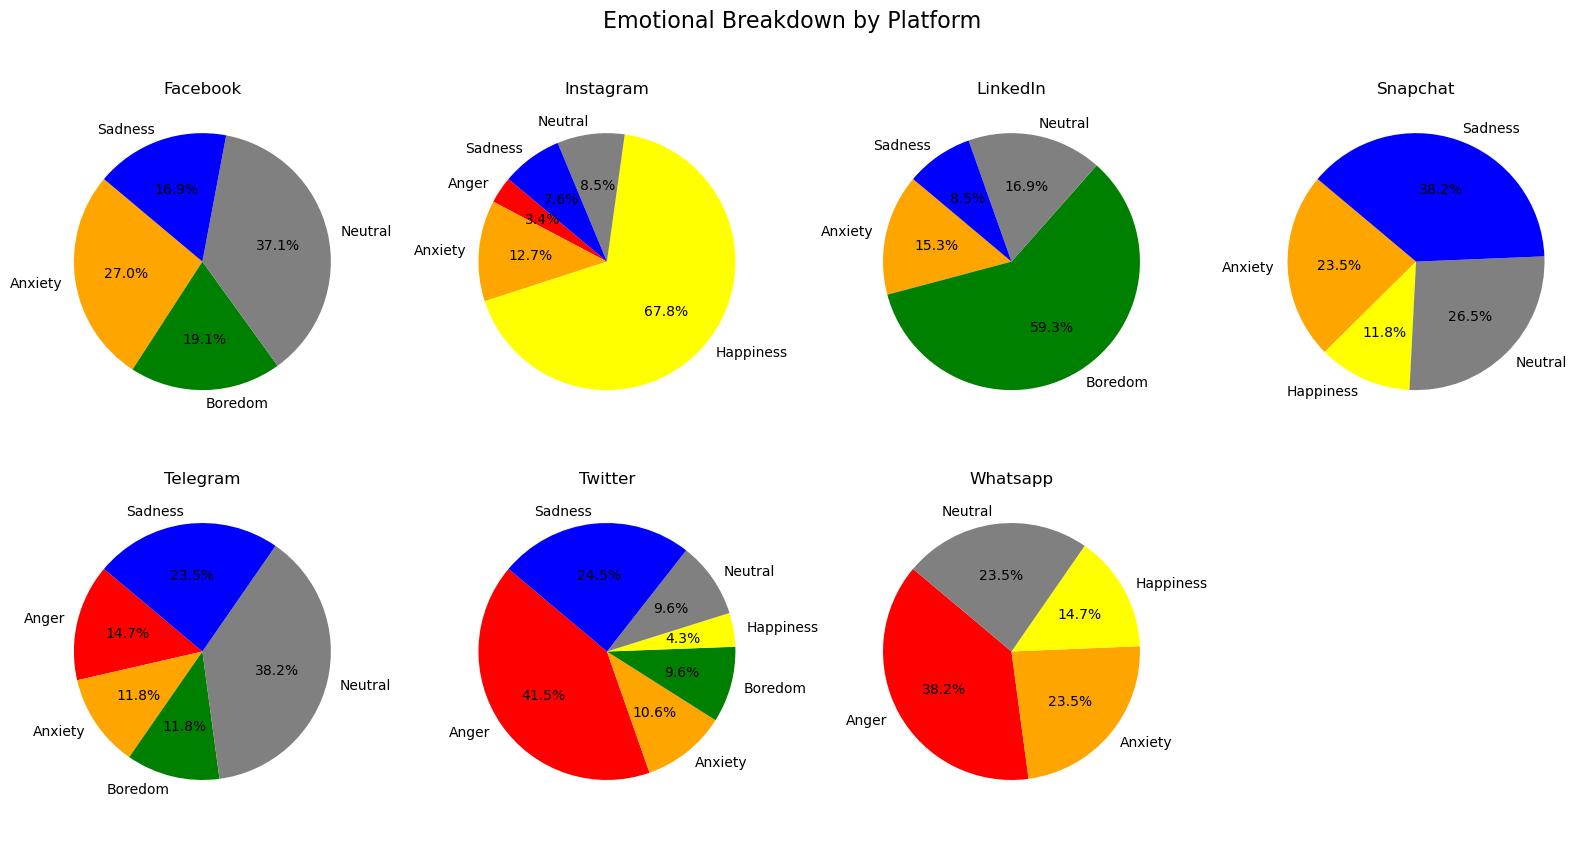

In [74]:
# Create a pie chart for each platform's emotional breakdown
fig, axes = plt.subplots(2, 4, figsize=(16, 8))  # 2 rows, 4 columns
axes = axes.flatten()

# Iterate through platforms and plot them
for idx, platform in enumerate(jen_PDC['Platform'].unique()):
    platform_data = jen_PDC[jen_PDC['Platform'] == platform]
    
    sizes = platform_data['Count']
    labels = platform_data['Dominant_Emotion']
    colors = [emotion_colors.get(emotion, 'grey') for emotion in labels]  # Default to grey if emotion is not in the color dictionary

    axes[idx].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    axes[idx].set_title(f'{platform}')

# Hide the extra subplot (last one)
axes[-1].axis('off')

# Adjust layout to remove extra space and avoid overlap
plt.tight_layout()
plt.suptitle('Emotional Breakdown by Platform', fontsize=16, y=1.05)
plt.show()